In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
dataset = pd.read_csv("airline_passengers.csv")
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [4]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [7]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
dataset.tail()

,Month,Thousands of Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [9]:
dataset.set_index('Month', inplace=True)

In [10]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

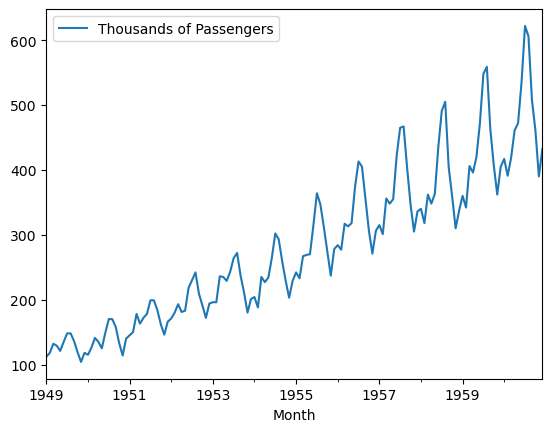

In [11]:
dataset.plot()

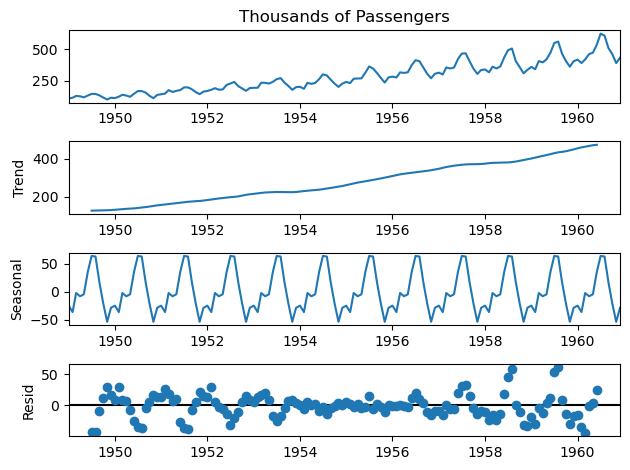

In [13]:
# Decomposition 

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_1 = seasonal_decompose(dataset['Thousands of Passengers'],model='additive',period=12)
decomposition_2 = seasonal_decompose(dataset['Thousands of Passengers'],model='multiplicative',period=12)
decomposition_1.plot()
plt.show()

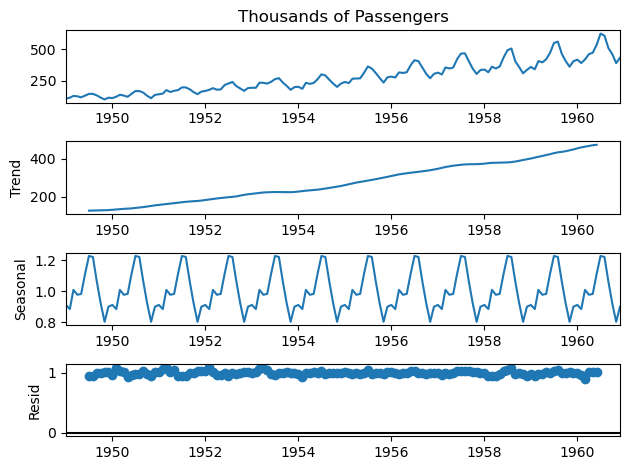

In [14]:
decomposition_2.plot()
plt.show()

# Check durbin watson test - for autocorrelation

In [15]:
sm.stats.durbin_watson(dataset['Thousands of Passengers'])

0.0121527966037621

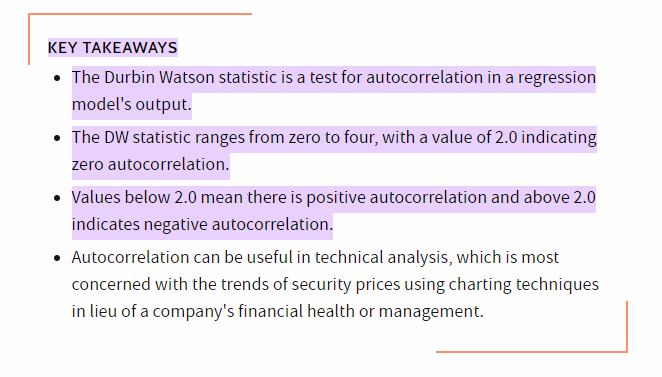

# Dataset should be Stationary - mandatory

# Method to check data is staionary or not - "Augmented Dickey Fuller Test"

In [16]:
from statsmodels.tsa.stattools import adfuller

In [18]:
len(dataset)

144

In [17]:
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060433,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [19]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("*******Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******")
    labels = ['ADF Stats Test','p-value','#Lags','No of Observation']
    
    for i, j in zip(result, labels):
        print(j + " : " + str(i))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Weak evidence against null hypothesis and my timeseries is Non-Stationary")
    

In [20]:
adf_check(dataset['Thousands of Passengers'])

*******Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******
ADF Stats Test : 0.8153688792060433
p-value : 0.9918802434376409
#Lags : 13
No of Observation : 130
Weak evidence against null hypothesis and my timeseries is Non-Stationary


In [21]:
dataset['1st Diff'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(1)

In [22]:
dataset.head(20)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [24]:
adf_check(dataset['1st Diff'].dropna())

*******Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******
ADF Stats Test : -2.8292668241699954
p-value : 0.05421329028382609
#Lags : 12
No of Observation : 130
Weak evidence against null hypothesis and my timeseries is Non-Stationary


In [25]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [26]:
dataset.head(10)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [27]:
adf_check(dataset['2nd Diff'].dropna())

*******Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******
ADF Stats Test : -16.3842315424685
p-value : 2.7328918500142407e-29
#Lags : 11
No of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [28]:
dataset['Seasonality'] = dataset['Thousands of Passengers'] - dataset['Thousands of Passengers'].shift(12)

In [29]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [30]:
adf_check(dataset['Seasonality'].dropna())

*******Augmented Dickey Fuller Test - To check data is Stationary or Non-stationary*******
ADF Stats Test : -3.3830207264924814
p-value : 0.011551493085514952
#Lags : 1
No of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [ ]:
# My TimeSeries Trend and Seasonality both are Stationary now
# Trend : d = 2
# Seasonality : D = 1